In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import save_image
import os 
import cv2 
from PIL import Image 
from tqdm import tqdm
# CUDA_VISIBLE_DEVICES = 1
torch.cuda.is_available()

True

    set random seeds

In [2]:
def set_seeds(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.backends.cudnn.benchmark = False 
    torch.backends.cudnn.deterministic = True 
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)

set_seeds(1454)

# or 
# myseed = 6666
# torch.backends.cudnn.deterministic = True 
# torch.backends.cudnn.benchmark = False 
# np.random.seed(myseed)
# torch.manual_seed(myseed)
# if torch.cuda.is_available():
#     torch.cuda.manual_seed_all(myseed)



# 1  Some examples

In [3]:
torch.cuda.is_available()

True

## 1.1 Example 1: Read dataset and display 

In [4]:
trans = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
])
data_set = torchvision.datasets.CIFAR10(root='../Datasets/cifar10', train=False, transform=trans, download=True)
data_loader = DataLoader(data_set, batch_size=30, shuffle=True)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


data_set can access with subscript

deer


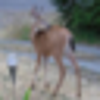

In [5]:
data, label = data_set[100]
print(classes[label])
show = transforms.ToPILImage()
# +1/2 反归一化,重新回到 0-1之间
show((data + 1) / 2).resize((100, 100))


bad method

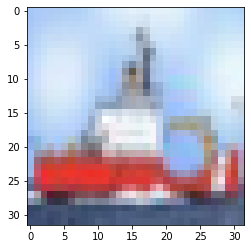

In [6]:
for i, (images, l) in enumerate(data_loader):
    # print(i)
    img = images[0]
    # print(img)
    # values in images: 0~1
    img = (img + 1) / 2
    # image's shape in netowrk: (channels, height, width) type:tensor
    # image's shape in plt: (height, width, channels)  type:array
    img = np.transpose(img.numpy(), (1, 2, 0))
    plt.imshow(img)
    plt.show()
    break

    Display pictures in grid

dog bird frog deer plane cat dog frog car car bird cat deer car deer bird truck horse car bird car plane truck plane frog bird ship frog car bird


torch.Size([30, 3, 32, 32])

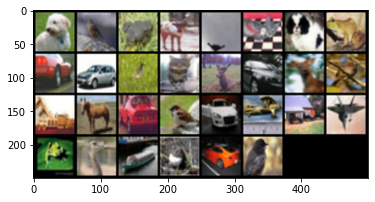

In [7]:
dataiter = iter(data_loader)
# get next batch 
images, labels = dataiter.next()
# show = transforms.ToPILImage()
plt.imshow(transforms.ToPILImage()(torchvision.utils.make_grid((images+1)/2)).resize((500, 250)))
# print labels 
print(' '.join(classes[labels[j]] for j in range(30)))
images.shape

bad method

torch.Size([30, 3, 32, 32])


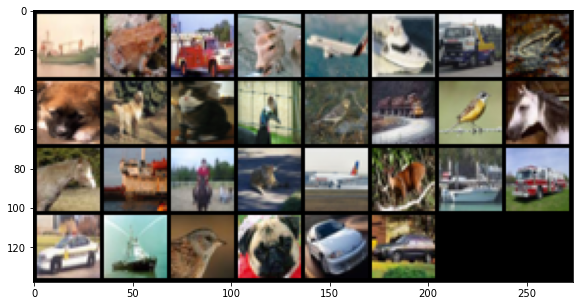

In [8]:
for i, (images, _) in enumerate(data_loader):
    print(images.shape)
    img = torchvision.utils.make_grid((images+1)/2)
    img = np.transpose(img.numpy(), (1, 2, 0))
    plt.figure(figsize=(16,5))
    plt.imshow(img)
    break 

    Display images with labels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


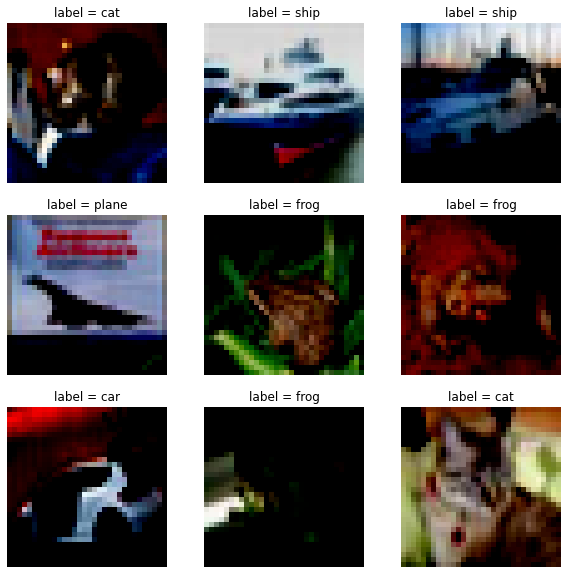

In [12]:
plt.figure(figsize=(10, 10))
for i in range(9):
    img, label = data_set[i]
    img = img.permute(1, 2, 0)
    ax = plt.subplot(3, 3, i+1)
    ax.imshow(img.numpy())
    ax.set_title('label = ' + classes[label])
    ax.axis('off')


## 1.2 Example 2: Inllustration of transforms

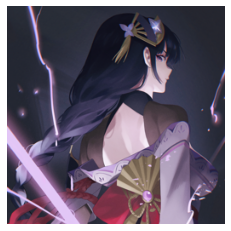

In [45]:
# image read by Pillow
orig_img = Image.open('./Raiden.jpg')
# crop
orig_img = orig_img.crop((300, 0, 2480, 2180))
# orig_img.show()
orig_img = orig_img.resize((256, 256))
orig_img.size

plt.axis('off')
plt.imshow(orig_img)


In [10]:
# image read by plt

# orig_img = mpimg.imread('./Raiden.jpg')
# plt.figure(figsize=(15,10))
# plt.axis('off')
# plt.imshow(orig_img)

(2180, 2616, 3)
(256, 256, 3)


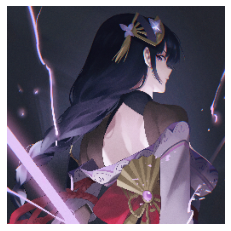

In [11]:
# image read by cv2 
orig_img = cv2.imread('./imgs/Raiden.jpg')
print(orig_img.shape)
# crop 
orig_img = orig_img[:, 300: 2480]
# resize 
orig_img = cv2.resize(orig_img, (256, 256))
print(orig_img.shape)
# channels are BGR but not RGB when using cv2 to read image
orig_img = cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB)

plt.axis('off')
plt.imshow(orig_img)


    Assume used Pillow instead of the other two

In [46]:
tran = transforms.Resize(44)
imgs = [tran(orig_img) for _ in range(4)]

(256, 256)
(44, 44)
(44, 44)
(44, 44)
(44, 44)


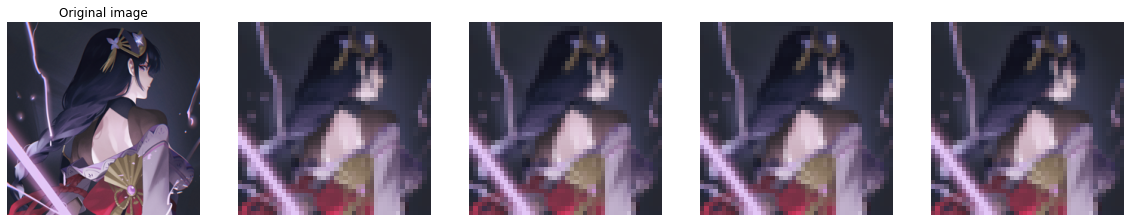

In [47]:
num_rows = 1
num_cols = 5 
fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20,15))
# also display original img
imgs = [orig_img] + imgs 
axs[0].set(title='Original image')
for i in range(5):
    axs[i].imshow(np.asarray(imgs[i]))
    axs[i].axis('off')
    print(imgs[i].size)


# 2  Dataset & Preprocessing

## 2.1 Food dataset

    transforms by torchvision

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import torch 
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn 
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision.utils import save_image
import os 
import cv2 
from PIL import Image 
from tqdm import tqdm
import time 
torch.cuda.is_available()

True

In [2]:
train_transforms = transforms.Compose([
    transforms.Resize((144, 144)),
    transforms.RandomCrop((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomAffine(degrees=(10,30), translate=(0.1, 0.2), scale=(0.75, 1)),
    transforms.AutoAugment(),
    
    transforms.ToTensor(),
])

test_transforms = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_transforms_cute = transforms.Compose([
    transforms.Resize((144, 144)),
    transforms.RandomCrop((128, 128)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
])

test_transforms_beta = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),

])

    Dataset class (overwrite Dataset)

In [3]:
class FoodDataset(Dataset):
    def __init__(self, path, transform=test_transforms, files=None):
        # super避免多重继承问题
        super(FoodDataset).__init__()
        self.path = path
        
        self.files = sorted([os.path.join(path, x) for x in os.listdir(path) if x.endswith('.jpg')])
        if files != None:
            self.files = files
        print(self.files[0])
        self.transform = transform
        
    def __getitem__(self, index):
        file = self.files[index]
        img = Image.open(file)
        img = self.transform(img)
        try:
            label = int(file.split('/')[-1].split('_')[0])
        except:
            label = -1 
        
        return img, label 
    
    def __len__(self):
        return len(self.files)

../Datasets/food11/training/0_0.jpg
torch.Size([16, 3, 128, 128])


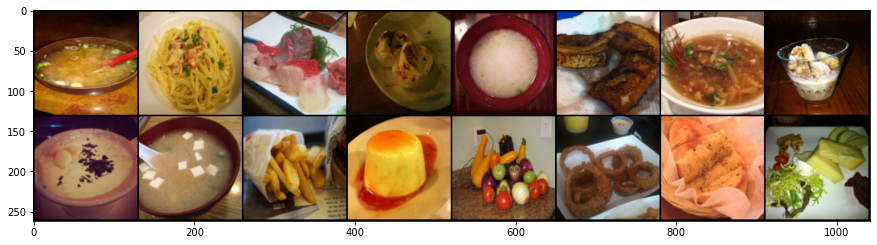

In [12]:
path = '../Datasets/food11'
data = FoodDataset(path=os.path.join(path, 'training'), transform=test_transforms)
loader = DataLoader(dataset=data, batch_size=16, shuffle=True)
for i, (images, label) in enumerate(loader):
    print(images.shape)
    img = torchvision.utils.make_grid(images)
    img = transforms.ToPILImage()(img)
#     img = np.transpose(img, (1, 2, 0))
    plt.figure(figsize=(15, 5))
    plt.imshow(img)
    break 

## 2.2 Cat & Dog Dataset 

In [5]:
class CatDogDataset(Dataset):
    def __init__(self, root, train=True, test=False, transforms=test_transforms):
        super(CatDogDataset, self).__init__()
        self.root = root
        self.test = test
        imgs = [os.path.join(root, x) for x in os.listdir(root)]
        
        # sort images before divide datasets as training and validation
        if self.test:
            imgs = sorted(imgs, key=lambda x: int(x.split('.')[-2].split('/')[-1]))
        else:
            imgs = sorted(imgs, key=lambda x: int(x.split('.')[-2]))

        img_nums = len(imgs)

        # for different sets
        if test:
            self.imgs = imgs 
        elif train:
            self.imgs = imgs[:int(0.7*img_nums)]
        else:
            self.imgs = imgs[int(0.7*img_nums):]
        print(self.imgs[0])

        self.transforms = transforms

    def __getitem__(self, index):
        img_path = self.imgs[index]
        img = Image.open(img_path)
        img = self.transforms(img)

        if self.test:
            label = -1
        else:
            label = 1 if 'dog' in img_path.split('/')[-1] else 0

        return img, label 

    def __len__(self):
        return len(self.imgs)
    

In [6]:
root = '../Datasets/dogs-vs-cats/train'
imgs = [os.path.join(root, img) for img in os.listdir(root)] 
imgs 
sorted(imgs, key=lambda x:int(x.split('.')[-2]))
# imgs[2].split('/')[-1]
# sorted(imgs)
# root2 = '../Datasets/dogs-vs-cats/test'
# imgs2 = [os.path.join(root2, img) for img in os.listdir(root2)] 
# imgs2[1].split('.')[-2]
# sorted(imgs2, key=lambda x:int(x.split('.')[]))

['../Datasets/dogs-vs-cats/train/dog.0.jpg',
 '../Datasets/dogs-vs-cats/train/cat.0.jpg',
 '../Datasets/dogs-vs-cats/train/dog.1.jpg',
 '../Datasets/dogs-vs-cats/train/cat.1.jpg',
 '../Datasets/dogs-vs-cats/train/cat.2.jpg',
 '../Datasets/dogs-vs-cats/train/dog.2.jpg',
 '../Datasets/dogs-vs-cats/train/cat.3.jpg',
 '../Datasets/dogs-vs-cats/train/dog.3.jpg',
 '../Datasets/dogs-vs-cats/train/dog.4.jpg',
 '../Datasets/dogs-vs-cats/train/cat.4.jpg',
 '../Datasets/dogs-vs-cats/train/dog.5.jpg',
 '../Datasets/dogs-vs-cats/train/cat.5.jpg',
 '../Datasets/dogs-vs-cats/train/cat.6.jpg',
 '../Datasets/dogs-vs-cats/train/dog.6.jpg',
 '../Datasets/dogs-vs-cats/train/dog.7.jpg',
 '../Datasets/dogs-vs-cats/train/cat.7.jpg',
 '../Datasets/dogs-vs-cats/train/dog.8.jpg',
 '../Datasets/dogs-vs-cats/train/cat.8.jpg',
 '../Datasets/dogs-vs-cats/train/dog.9.jpg',
 '../Datasets/dogs-vs-cats/train/cat.9.jpg',
 '../Datasets/dogs-vs-cats/train/cat.10.jpg',
 '../Datasets/dogs-vs-cats/train/dog.10.jpg',
 '../Dat

In [7]:
root = '../Datasets/dogs-vs-cats'
data_set = CatDogDataset(root = os.path.join(root, 'train'), transforms=test_transforms)
data_loader = DataLoader(data_set, batch_size=16, shuffle=True)


../Datasets/dogs-vs-cats/train/dog.0.jpg


lenth:  17500


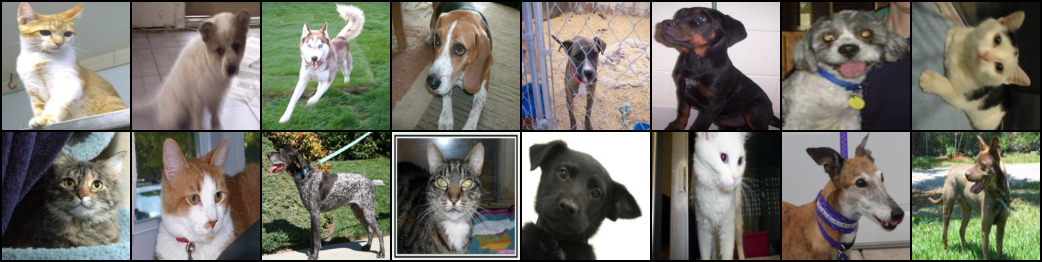

In [10]:
data_iter = iter(data_loader)
images, labels = data_iter.next()
img = torchvision.utils.make_grid(images)
print('lenth: ', len(data_set))
transforms.ToPILImage()(img)

# 3 Network model

In [57]:
class BasicModule(torch.nn.Module):
    """
    封装了nn.Module,主要是提供了save和load两个方法
    """

    def __init__(self):
        super(BasicModule,self).__init__()
        self.model_name=str(type(self))# 默认名字

    def load(self, path):
        """
        可加载指定路径的模型
        """
        self.load_state_dict(t.load(path))

    def save(self, name=None):
        """
        保存模型，默认使用“模型名字+时间”作为文件名
        """
        if name is None:
            prefix = 'checkpoints/' + self.model_name + '_'
            name = time.strftime(prefix + '%m%d_%H:%M:%S.pth')
        t.save(self.state_dict(), name)
        return name

    def get_optimizer(self, lr, weight_decay):
        return torch.optim.Adam(self.parameters(), lr=lr, weight_decay=weight_decay)



## Simple CNN

    a cnn with nothing special

In [58]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, 3, 1, 1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(64, 128, 3, 1, 1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(128, 256, 3, 1, 1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(256, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            
            nn.Conv2d(512, 512, 3, 1, 1),
            nn.BatchNorm2d(512),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        
        self.fc = nn.Sequential(
            nn.Linear(512*4*4, 1024),
            nn.Dropout(0.4),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.Dropout(0.5),
            nn.ReLU(),
            nn.Linear(512, 11),
        )
        
    def forward(self, x):
        out = self.cnn(x)
        out = out.view(out.shape[0], -1)
        out = self.fc(out)
        return out

In [59]:
cnn = SimpleCNN()
# for name, parameters in cnn.named_parameters():
#     print(name, parameters.shape)
cnn 
cnn._modules
cnn._parameters
cnn.cnn 
for name, param in cnn.named_parameters():
    print(name, param.size())
for name, submodel in cnn.named_modules():
    print(name, submodel)

cnn.0.weight torch.Size([64, 3, 3, 3])
cnn.0.bias torch.Size([64])
cnn.1.weight torch.Size([64])
cnn.1.bias torch.Size([64])
cnn.4.weight torch.Size([128, 64, 3, 3])
cnn.4.bias torch.Size([128])
cnn.5.weight torch.Size([128])
cnn.5.bias torch.Size([128])
cnn.8.weight torch.Size([256, 128, 3, 3])
cnn.8.bias torch.Size([256])
cnn.9.weight torch.Size([256])
cnn.9.bias torch.Size([256])
cnn.12.weight torch.Size([512, 256, 3, 3])
cnn.12.bias torch.Size([512])
cnn.13.weight torch.Size([512])
cnn.13.bias torch.Size([512])
cnn.16.weight torch.Size([512, 512, 3, 3])
cnn.16.bias torch.Size([512])
cnn.17.weight torch.Size([512])
cnn.17.bias torch.Size([512])
fc.0.weight torch.Size([1024, 8192])
fc.0.bias torch.Size([1024])
fc.3.weight torch.Size([512, 1024])
fc.3.bias torch.Size([512])
fc.6.weight torch.Size([11, 512])
fc.6.bias torch.Size([11])
 SimpleCNN(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0

## Resnet
    An useful architecture for image recognition

- 对于模型中的重复部分，实现为子module或用函数生成相应的module`make_layer`
- nn.Module和nn.Functional结合使用
- 尽量使用`nn.Seqential`

![图4-2: ResNet34网络结构](imgs/resnet1.png)
![图4-3: Residual block 结构图](imgs/residual.png)
 [^7]: He K, Zhang X, Ren S, et al. Deep residual learning for image recognition[C]//Proceedings of the IEEE Conference on Computer Vision and Pattern Recognition. 2016: 770-778.and

In [60]:
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=1):
        super(ResidualBlock, self).__init__()
        self.left = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(out_channels)
        )
        self.right = None 
        if stride != 1 or in_channels != out_channels:
            self.right = nn.Sequential(
                nn.Conv2d(in_channels, out_channels, kernel_size=1, stride=stride),
                nn.BatchNorm2d(out_channels)
            )
        self.relu = nn.ReLU()
        
    def forward(self, x):
        out = self.left(x)
        residual = x if self.right is None else self.right(x)
        out += residual
        return F.relu(out)

In [61]:
class Resnet(nn.Module):
    def __init__(self, layers=[2, 2, 2, 2], num_classes=100):
        super(Resnet, self).__init__()
        self.pre = nn.Sequential(
            nn.Conv2d(3, 64, 7, 2, 3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(3, 2, 1)
        )
        self.layer1 = self.make_layer(64, 64, layers[0])
        self.layer2 = self.make_layer(64, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(128, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(256, 512, layers[3], stride=2)
        
        self.fc = nn.Linear(512, num_classes)
        
    def make_layer(self, in_channels, out_channels, num_blocks, stride=1):
        
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride=stride))
        for i in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)
            
    def forward(self, x):
        out = self.pre(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        
        out = F.avg_pool2d(out, 4)
        out = out.view(out.shape[0], -1)
        out = self.fc(out)
        return out 

    def load(self, path):
        self.load_state_dict(torch.load(path))

    def save(self, name=None):
        if name is None:
            prefix = os.path.join('checkpoints', 'model_')
            name = time.strftime(prefix + '%m%d_%H:%M:%S.pth')
        torch.save(self.state_dict(), name)
        return name 
            

In [62]:
time.strftime('123' + '%m%d_%H:%M:%S.pth')

'1230818_23:31:57.pth'

In [63]:
layers=[3, 4, 6, 3]
net = Resnet(layers=layers, num_classes=11)
for img, label in loader:
    out = net(img)
    print(out.shape)
    break 

torch.Size([16, 11])


In [64]:
class Resnet18(nn.Module):
    def __init__(self):
        super(Resnet18, self).__init__()
        
        self.pre = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(3, 2, 1)
        )
        
        self.layer1 = self.make_layer(64, 64, layers[0])
        self.layer2 = self.make_layer(64, 128, layers[1], stride=2)
        self.layer3 = self.make_layer(128, 256, layers[2], stride=2)
        self.layer4 = self.make_layer(256, 512, layers[3], stride=2)
        
        self.fc = nn.Linear(512, num_classes)
        
    def make_layers(self, in_channels, out_channels, block_nums, stride=1):
        layers = []
        layers.append(ResidualBlock(in_channels, out_channels, stride=stride))
        for i in range(1, block_nums):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)
    
    def forward(self, x):
        out = self.pre(x)
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        
        out = F.avg_pool2d(out, 4)
        out = out.view(out.shape[0], -1)
        out = self.fc(out)
        return out 


In [65]:
net = Resnet18()
params = list(net.parameters())
len(params)
print(net)

Resnet18(
  (pre): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  )
  (layer1): Sequential(
    (0): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU()
        (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (right): Sequential(
        (0): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
        (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU()
    )
    (1)

    net.named_parameters returns learnable parameters and names at the same time 

In [66]:
# for name, parameters in net.named_parameters():
#     print(name,':', parameters.size())

In [67]:
for _, (img, label) in enumerate(loader):
    print(img.shape)
    out = net(img)
    print(out.shape)
#     loss = criterion(out, label)
#     print(loss.shape)
    break 

torch.Size([16, 3, 128, 128])
torch.Size([16, 11])


## Squeeze net

In [68]:
class SqueezeNet(BasicModule):
    def __init__(self, num_classes=2):
        super(SqueezeNet, self).__init__()
        self.model_name = 'squeezenet'
        self.model = torchvision.models.squeezenet1_1(pretrained=True)
        # 修改 原始的num_class: 预训练模型是1000分类
        self.model.num_classes = num_classes
        self.model.classifier =   nn.Sequential(
            nn.Dropout(p=0.5),
            nn.Conv2d(512, num_classes, 1),
            nn.ReLU(inplace=True),
            nn.AvgPool2d(13, stride=1)
        )

    def forward(self,x):
        return self.model(x)

    def get_optimizer(self, lr, weight_decay):
        # 因为使用了预训练模型，我们只需要训练后面的分类
        # 前面的特征提取部分可以保持不变
        return torch.optim.Adam(self.model.classifier.parameters(), lr, weight_decay=weight_decay) 

## Import other models  

    In this way, we can only change the str to change models.
    When adding new models, add from.new_model import new_model in models/__init__.py

In [69]:
from models import AlexNet

model = AlexNet()
model 

import models 
model = getattr(models, 'AlexNet')()
model 

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, 

# 4 Training & Testing

## 4.1 Training and validation

In [70]:
# 1. food 2. catdog
dataset = 'catdog'
# dataset = 'food'

In [71]:
# food dataset 
if dataset == 'food':
    root_path = '../Datasets/food11'
    batch_size = 128

    train_data = FoodDataset(os.path.join(root_path, 'training'), transform=train_transforms)
    valid_data = FoodDataset(os.path.join(root_path, 'validation'), transform=test_transforms)

    train_loader = DataLoader(train_data, batch_size, shuffle=True, num_workers=16)
    valid_loader = DataLoader(valid_data, batch_size, shuffle=True, num_workers=16)

# catdog dataset
if dataset == 'catdog':
    root_path = '../Datasets/dogs-vs-cats'
    batch_size = 64
    train_data = CatDogDataset(os.path.join(root_path, 'train'), transforms=train_transforms_cute)
    valid_data = CatDogDataset(os.path.join(root_path, 'train'), train=False, transforms=test_transforms)

    train_loader = DataLoader(train_data, batch_size, shuffle=True, num_workers=16)
    valid_loader = DataLoader(valid_data, batch_size, shuffle=True, num_workers=16)


../Datasets/dogs-vs-cats/train/dog.0.jpg
../Datasets/dogs-vs-cats/train/dog.8750.jpg


In [117]:
import torchvision.models as models 

# class Resnet34_others(nn.Module):
#     def __init__(self, num_classes=2):
#         super(Resnet34_others, self).__init__()
#         resnet = models.resnet34(pretrained=True)
#         self.resnet = nn.Sequential(*list(resnet.children())[:-1])
#         self.fc = nn.Linear(512, num_classes)

#     def forward(self, x):
#         x = self.resnet(x)
#         x = x.view(x.shape[0], -1)
#         x = self.fc(x)
#         return x 

Resnet34_others = models.resnet34(pretrained=True)
Resnet34_others.fc = nn.Linear(512, 2)


In [118]:
from math import gamma
from pickletools import optimize
from sched import scheduler


device = 'cuda' if torch.cuda.is_available() else 'cpu'
if dataset == 'food':
    ex_name = 'ex_resnet18_Adam'
    dataset_name = 'food'

    lr = 0.0001
    model = Resnet(layers=[2,3,3,1], num_classes=11).to(device)
    criterion = nn.CrossEntropyLoss()
    # criterion has no learnable parameter, but use cuda in case
    criterion.cuda()
    # optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
        optimizer, T_0=15, T_mult=1
        )
    epochs = 150
    train_size = train_data.__len__()
    valid_size = valid_data.__len__()
    iter_train = int(train_size / (batch_size * 5))
    iter_valid = int(valid_size / (batch_size * 5))
    iter_train, iter_valid
    # torch.cuda.is_available()

if dataset == 'catdog':
    ex_name = 'ex_resnet34_Adam'
    dataset_name = 'catdog'

    lr = 0.0001
    model = Resnet34_others.to(device)
    # model = Resnet(layers=[3,4,6,3], num_classes=2).to(device)
    criterion = nn.CrossEntropyLoss()
    # criterion has no learnable parameter, but use cuda in case
    criterion.cuda()
    # optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=1e-5)
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, weight_decay=1e-5)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.5)
    # scheduler = torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(
    #     optimizer, T_0=24, T_mult=1
    #     )
    epochs = 10
    train_size = train_data.__len__()
    valid_size = valid_data.__len__()
    iter_train = int(train_size / (batch_size * 5))
    iter_valid = int(valid_size / (batch_size * 5))
    iter_train, iter_valid
    # torch.cuda.is_available()



In [119]:
train_loss_list =[]
train_acc_list = []
valid_loss_list = []
valid_acc_list = []
best_acc = 0 
patience = 24

In [120]:
for epoch in range(epochs):
    # training
    train_acc = []
    train_loss = []
    i = 0 
    for imgs, labels in tqdm(train_loader):
        # don't do this?
        # imgs = imgs.to(device)
        # labels = labels.to(device)
    
        out = model(imgs.to(device))
        predict = out.argmax(dim=1)

        loss = criterion(out, labels.to(device)) 

        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()   

        
        acc = (predict == labels.to(device)).float().mean()
        
        train_loss.append(loss)
        train_acc.append(acc)
        
        if i % iter_train == 0:
            train_loss_list.append(loss)
            train_acc_list.append(acc)
            vis.plot('train loss', loss.cpu().detach().numpy())
        i += 1 
    epoch_train_loss = sum(train_loss) / len(train_loss)
    epoch_train_acc = sum(train_acc) / len(train_acc)
    scheduler.step()

    print('learning rate', optimizer.param_groups[0]['lr'])
    print(f'| Train | {epoch + 1:03d}/{epochs:03d} | loss = {epoch_train_loss:.5f}, acc= {epoch_train_acc:.5f}')
    
    # validation
    model.eval()
    
    valid_acc = []
    valid_loss = []
    i = 0 
    for imgs, labels in tqdm(valid_loader):

        with torch.no_grad():
            out = model(imgs.to(device))
        
        loss = criterion(out, labels.to(device))
        predict = out.argmax(dim=1)
        acc = (predict == labels.to(device)).float().mean()
        
        valid_acc.append(acc)
        valid_loss.append(loss)
        
        if i % iter_valid == 0:
            valid_loss_list.append(loss)
            valid_acc_list.append(acc)

        i += 1 
    epoch_valid_loss = sum(valid_loss) / len(valid_loss)
    epoch_valid_acc = sum(valid_acc) / len(valid_acc)
    
    
    print(f'| Valid | {epoch + 1:03d}/{epochs:03d} | loss = {epoch_valid_loss:.5f}, acc= {epoch_valid_acc:.5f}')
        
    # cannot print to txt, but why?
    
    # if epoch_valid_acc > best_acc:
    #     with open(f"./{ex_name}_log.txt","a"):
    #         print(f"[ Valid | {epoch + 1:03d}/{epochs:03d} ] loss = {epoch_valid_loss:.5f}, acc = {epoch_valid_acc:.5f} -> best")
    # else:
    #     with open(f"./{ex_name}_log.txt","a"):
    #         print(f"[ Valid | {epoch + 1:03d}/{epochs:03d} ] loss = {epoch_valid_loss:.5f}, acc = {epoch_valid_acc:.5f}")
    


    if epoch_valid_acc > best_acc:
        print(f"[ Valid | {epoch + 1:03d}/{epochs:03d} ] loss = {epoch_valid_loss:.5f}, acc = {epoch_valid_acc:.5f} -> best")
        print(f'Best model found at epoch {epoch}, saving!')
        torch.save(model.state_dict(), f'{dataset_name}/{ex_name}_best.ckpt')
        best_acc = epoch_valid_acc
        stale = 0 
        
    else:
        stale += 1
        print(f'| Valid | {epoch + 1:03d}/{epochs:03d} | loss = {epoch_valid_loss:.5f}, acc= {epoch_valid_acc:.5f}')

        if stale > patience:
            print(f'No improvements {patience} consecutive epochs, early stopping')
            break 
    

100%|██████████| 137/137 [00:29<00:00,  4.65it/s]


learning rate 0.0001
| Train | 001/010 | loss = 0.65640, acc= 0.61571


100%|██████████| 59/59 [00:06<00:00,  8.51it/s]


| Valid | 001/010 | loss = 0.58704, acc= 0.67698
[ Valid | 001/010 ] loss = 0.58704, acc = 0.67698 -> best
Best model found at epoch 0, saving!


100%|██████████| 137/137 [00:30<00:00,  4.45it/s]


learning rate 0.0001
| Train | 002/010 | loss = 0.44922, acc= 0.79370


100%|██████████| 59/59 [00:07<00:00,  7.77it/s]


| Valid | 002/010 | loss = 0.37675, acc= 0.83583
[ Valid | 002/010 ] loss = 0.37675, acc = 0.83583 -> best
Best model found at epoch 1, saving!


100%|██████████| 137/137 [00:31<00:00,  4.38it/s]


learning rate 0.0001
| Train | 003/010 | loss = 0.28986, acc= 0.88598


100%|██████████| 59/59 [00:06<00:00,  8.48it/s]


| Valid | 003/010 | loss = 0.26689, acc= 0.88913
[ Valid | 003/010 ] loss = 0.26689, acc = 0.88913 -> best
Best model found at epoch 2, saving!


 15%|█▍        | 20/137 [00:08<00:50,  2.30it/s]


KeyboardInterrupt: 

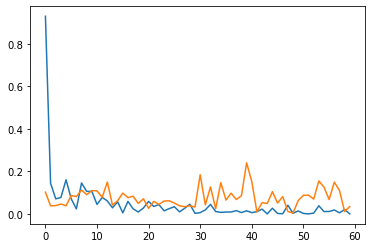

In [84]:
train_loss_list = torch.tensor(train_loss_list, device='cpu')
valid_loss_list = torch.tensor(valid_loss_list, device='cpu')

x_axis = np.arange(len(train_loss_list))
x2_axis = np.arange(len(valid_loss_list))
plt.plot(x_axis, train_loss_list)
plt.plot(x2_axis, valid_loss_list)

Problems:
    
    1. Difference lenth of valid_list and train_list 
    2. Inappropriate learning rate and optimization method 
    3. Network model is not good enough 

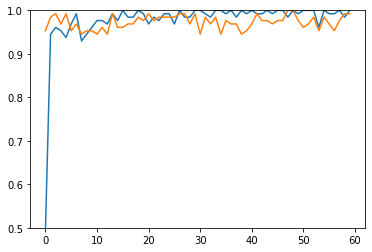

In [85]:
train_acc_list = torch.tensor(train_acc_list, device='cpu')
valid_acc_list = torch.tensor(valid_acc_list, device='cpu')

x_axis = np.arange(len(train_acc_list))
x2_axis = np.arange(len(valid_acc_list))
if dataset == 'food':
    plt.ylim(0, 1)
if dataset == 'catdog':
    plt.ylim(0.5, 1)
plt.plot(x_axis, train_acc_list)
plt.plot(x2_axis, valid_acc_list)

## Testing
    In food dataset, use validation set as testing set as real testing set doesn't have labels

In [86]:
if dataset == 'food':
    test_data = FoodDataset(os.path.join(root_path, 'validation'), transform=test_transforms)
    test_loader = DataLoader(test_data, 16, shuffle=True, num_workers=4)

if dataset == 'catdog':
    test_data = CatDogDataset(os.path.join(root_path, 'train'), train=False, transforms=test_transforms)
    test_loader = DataLoader(test_data, 16, shuffle=True, num_workers=4)

../Datasets/dogs-vs-cats/train/dog.8750.jpg


In [87]:
# load best model
model.load_state_dict(torch.load(os.path.join(dataset, ex_name + '_best.ckpt')))

<All keys matched successfully>

true label: 1 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0


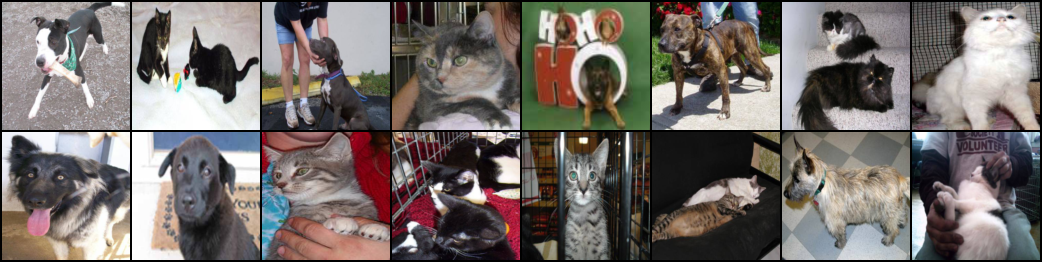

In [88]:
testiter = iter(test_loader)
images, labels = testiter.next()
str(int(labels[1]))

# print true labels and images
print('true label:', ' '.join(str(int(labels[j])) for j in range(16)))
img = torchvision.utils.make_grid(images)
transforms.ToPILImage()(img)

In [89]:
a = np.arange(5)
' '.join(str(a[j]) for j in range(5))

'0 1 2 3 4'

In [90]:
# print predicted 
output = model(images.to('cuda'))
_, predict = torch.max(output, axis=1)
p2 = output.argmax(axis=1)
_, predict,p2


(tensor([8.0266, 4.0990, 2.3503, 6.6351, 1.2239, 7.4709, 1.8070, 3.5806, 8.7473,
         8.6040, 6.6106, 4.3384, 7.0361, 3.8391, 0.3176, 0.4158],
        device='cuda:0', grad_fn=<MaxBackward0>),
 tensor([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1], device='cuda:0'),
 tensor([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1], device='cuda:0'))

    in whole testing set

In [91]:
correct = 0  # the number of correct predicted imgs
total = 0 # the number of total imgs

with torch.no_grad():
    for images, labels in test_loader:
        output = model(images.to('cuda'))
        predict = output.argmax(axis=1)
        
        correct += (predict == labels.to('cuda')).sum()
        total += labels.size(0)
correct / total

tensor(0.9768, device='cuda:0')

In [92]:
correct / total

tensor(0.9768, device='cuda:0')

In [93]:
# 清理显存
model = model.to('cpu')
torch.cuda.empty_cache()
torch.cuda.empty_cache()

In [40]:
asd = 'str123'
hasattr(asd, 'str')

False

# 5 Other tools

## 5.1 Visualize tools

In [80]:
# coding:utf8
import visdom
import time
import numpy as np


class Visualizer(object):
    """
    封装了visdom的基本操作，但是你仍然可以通过`self.vis.function`
    调用原生的visdom接口
    """

    def __init__(self, env='default', **kwargs):
        self.vis = visdom.Visdom(env=env,use_incoming_socket=False, **kwargs)

        # 画的第几个数，相当于横座标
        # 保存（’loss',23） 即loss的第23个点
        self.index = {}
        self.log_text = ''

    def reinit(self, env='default', **kwargs):
        """
        修改visdom的配置
        """
        self.vis = visdom.Visdom(env=env, **kwargs)
        return self

    def plot_many(self, d):
        """
        一次plot多个
        @params d: dict (name,value) i.e. ('loss',0.11)
        """
        for k, v in d.items():
            self.plot(k, v)

    def img_many(self, d):
        for k, v in d.items():
            self.img(k, v)

    def plot(self, name, y, **kwargs):
        """
        self.plot('loss',1.00)
        """
        x = self.index.get(name, 0)
        self.vis.line(Y=np.array([y]), X=np.array([x]),
                      win=name,
                      opts=dict(title=name),
                      update=None if x == 0 else 'append',
                      **kwargs
                      )
        self.index[name] = x + 1

    def img(self, name, img_, **kwargs):
        """
        self.img('input_img',t.Tensor(64,64))
        self.img('input_imgs',t.Tensor(3,64,64))
        self.img('input_imgs',t.Tensor(100,1,64,64))
        self.img('input_imgs',t.Tensor(100,3,64,64),nrows=10)

        ！！！don‘t ~~self.img('input_imgs',t.Tensor(100,64,64),nrows=10)~~！！！
        """
        self.vis.images(img_.cpu().numpy(),
                        win=name,
                        opts=dict(title=name),
                        **kwargs
                        )

    def log(self, info, win='log_text'):
        """
        self.log({'loss':1,'lr':0.0001})
        """

        self.log_text += ('[{time}] {info} <br>'.format(
            time=time.strftime('%m%d_%H%M%S'),
            info=info))
        self.vis.text(self.log_text, win)

    def __getattr__(self, name):
        return getattr(self.vis, name)

vis = Visualizer(env='default')



Setting up a new session...
Without the incoming socket you cannot receive events from the server or register event handlers to your Visdom client.


## 5.2 fire

In [44]:
import fire 

In [50]:
def add(x, y):
    return x + y 

def mul(**kwargs):
    a = kwargs['a']
    b = kwargs['b']
    return a * b 



ERROR: Cannot find key: --ip=127.0.0.1
Usage: ipykernel_launcher.py <group|command|value>
  available groups:      In | Out | exit | quit | os | sys | np | plt | mpimg |
                         torch | torchvision | transforms | nn | F | cv2 |
                         Image | train_transforms | test_transforms |
                         train_transforms_cute | test_transforms_beta | data |
                         loader | images | label | img | imgs | data_set |
                         data_loader | data_iter | labels | cnn | param |
                         submodel | time | model | models | visdom | fire
  available commands:    get_ipython | DataLoader | Dataset | save_image |
                         tqdm | FoodDataset | CatDogDataset | SimpleCNN |
                         ResidualBlock | strftime | Resnet | AlexNet |
                         Visualizer | add | mul
  available values:      path | i | root | name | asd | a | b

For detailed information on this command, run:
  ipy

FireExit: 2

/home/ebbi/worktools/anaconda3/envs/ebbi/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [ ]:

r